In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import networkx as nx

# Load the datasets
campaign_df = pd.read_csv('cleaned_campaign_performance.csv')
creator_df = pd.read_csv('cleaned_dataset_creator_profile.csv')

campaign_df.head(), creator_df.head()


(                 Account Platform                                        URL  \
 0           lauralestyle   tiktok           https://tiktok.com/@lauralestyle   
 1  dina.sweethome.style_   tiktok  https://tiktok.com/@dina.sweethome.style_   
 2            evanabowell   tiktok            https://tiktok.com/@evanabowell   
 3             she.is.liv   tiktok             https://tiktok.com/@she.is.liv   
 4            oakbankreno   tiktok            https://tiktok.com/@oakbankreno   
 
    Followers  Engagement Rate  Campaign Engagement Rate  Total Engagements  \
 0   126264.0             0.49                      1.21             1523.0   
 1    40023.0             0.66                      0.27              110.0   
 2    17869.0             1.06                      0.53              189.0   
 3       83.0            13.25                     43.98               73.0   
 4      347.0            13.26                      5.48               38.0   
 
    Media Count  Posts Count  Storie

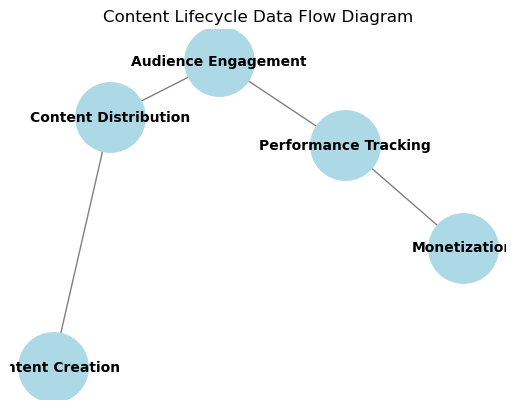

In [2]:
# Create a directed graph for the content lifecycle
G = nx.DiGraph()

# Define the lifecycle stages
nodes = [
    "Content Creation", 
    "Content Distribution", 
    "Audience Engagement", 
    "Performance Tracking", 
    "Monetization"
]

# Define data flow edges
edges = [
    ("Content Creation", "Content Distribution"),
    ("Content Distribution", "Audience Engagement"),
    ("Audience Engagement", "Performance Tracking"),
    ("Performance Tracking", "Monetization")
]

# Build the graph
G.add_nodes_from(nodes)
G.add_edges_from(edges)

# Layout for better visualization
pos = nx.spring_layout(G, seed=42)

# Draw the graph
nx.draw_networkx_nodes(G, pos, node_color='lightblue', node_size=2500)
nx.draw_networkx_edges(G, pos, arrowstyle='-|>', arrowsize=20, edge_color='gray')
nx.draw_networkx_labels(G, pos, font_size=10, font_weight='bold')

plt.title('Content Lifecycle Data Flow Diagram')
plt.axis('off')
plt.show()


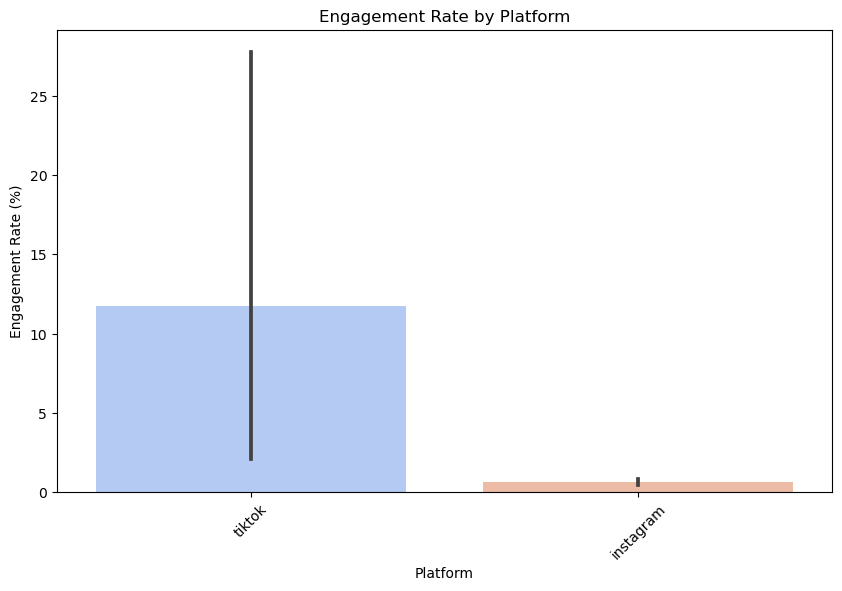

In [4]:
# Engagement Rate vs Platform
plt.figure(figsize=(10, 6))
sns.barplot(data=campaign_df, x='Platform', y='Engagement Rate', palette='coolwarm')
plt.title('Engagement Rate by Platform')
plt.xticks(rotation=45)
plt.ylabel('Engagement Rate (%)')
plt.xlabel('Platform')
plt.show()


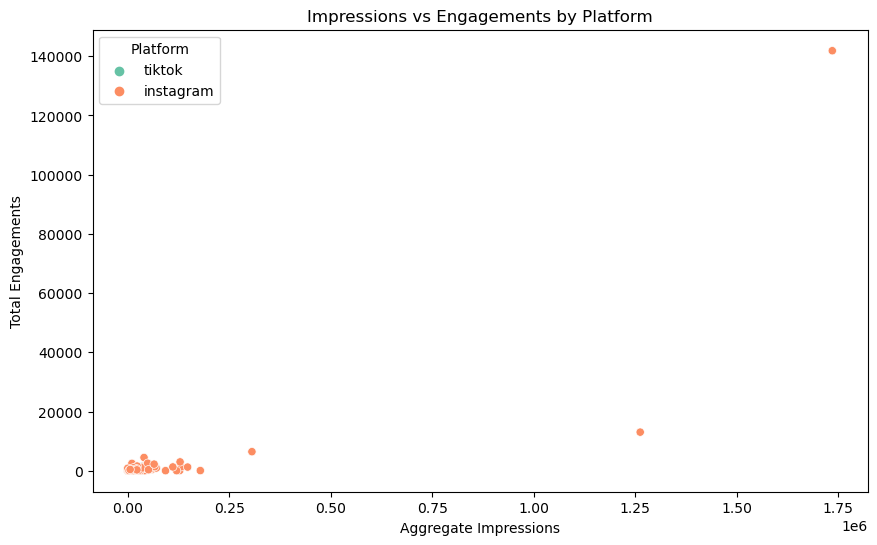

In [5]:
plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=campaign_df, 
    x='Aggregate Impressions', 
    y='Total Engagements', 
    hue='Platform',
    palette='Set2'
)
plt.title('Impressions vs Engagements by Platform')
plt.xlabel('Aggregate Impressions')
plt.ylabel('Total Engagements')
plt.show()


In [10]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

# Define the features and target
features = [
    'followers', 'engagements', 'engagement_rate', 
    'avg_comments', 'avg_likes', 'avg_reels_plays'
]
X = creator_df[features]
y = creator_df['CREDIBILITY SCORE (fraud detection)']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [11]:
# Check unique values and data type of the target variable
print(y_train.unique())
print(y_train.dtype)



[80.         45.41176471 10.         65.         30.         42.
 90.         60.         25.         48.         24.        ]
float64


In [12]:
# Categorize the credibility score into bins
bins = [0, 30, 70, 100]  
labels = ['Low', 'Medium', 'High']  

# Apply binning
y_train = pd.cut(y_train, bins=bins, labels=labels)
y_test = pd.cut(y_test, bins=bins, labels=labels)



In [13]:
print(y_train.isnull().sum())
print(y_test.isnull().sum())


0
0


In [14]:
# Re-initialize and train the model
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

# Make predictions
y_pred = rf_model.predict(X_test)


In [15]:
# Confusion Matrix and Classification Report
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Confusion Matrix:
[[0 1 1]
 [0 0 1]
 [0 1 1]]

Classification Report:
              precision    recall  f1-score   support

        High       0.00      0.00      0.00         2
         Low       0.00      0.00      0.00         1
      Medium       0.33      0.50      0.40         2

    accuracy                           0.20         5
   macro avg       0.11      0.17      0.13         5
weighted avg       0.13      0.20      0.16         5



C:\Users\lenovo\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\lenovo\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\lenovo\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


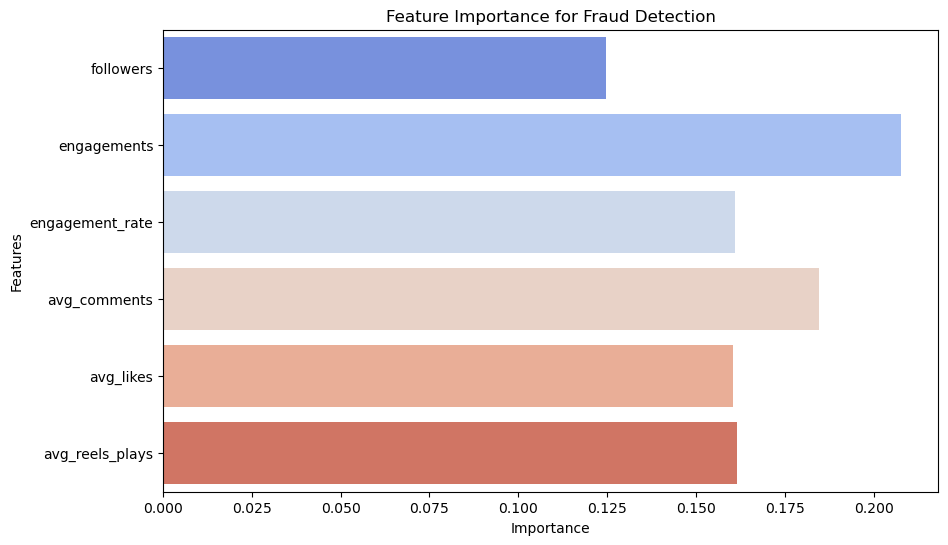

In [16]:
# Visualizing the importance of each feature
importances = rf_model.feature_importances_
feature_names = X.columns

plt.figure(figsize=(10, 6))
sns.barplot(x=importances, y=feature_names, palette='coolwarm')
plt.title('Feature Importance for Fraud Detection')
plt.xlabel('Importance')
plt.ylabel('Features')
plt.show()
